In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

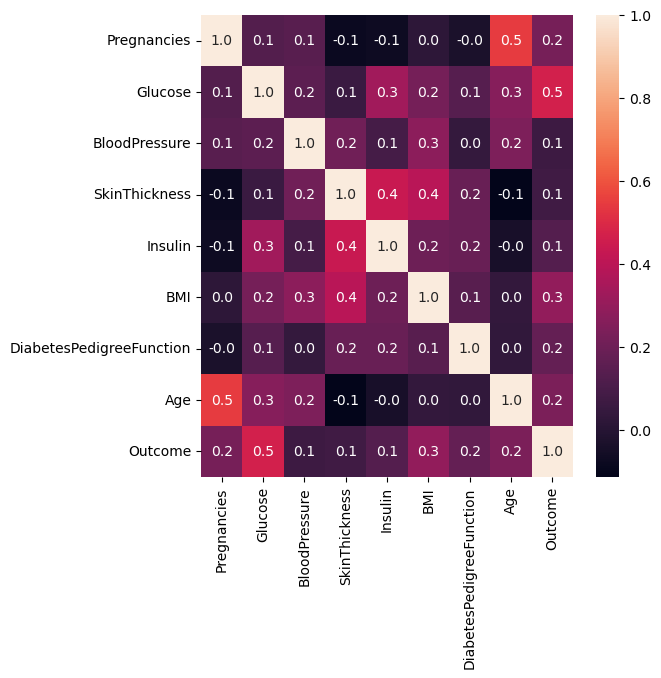

In [6]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(),annot=True,fmt=".1f")
plt.show()

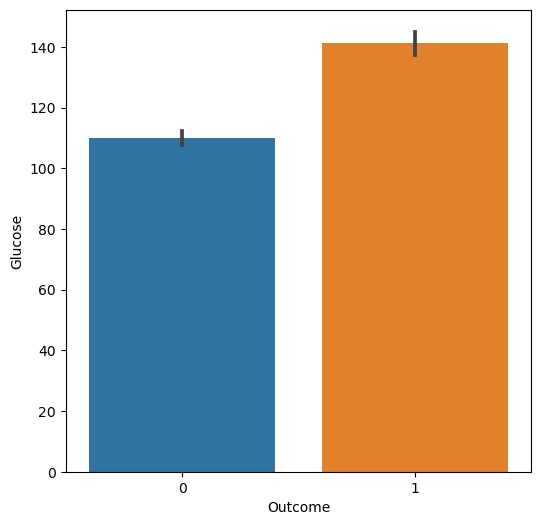

In [7]:
plt.figure(figsize=(6,6))
sns.barplot(data=df,x="Outcome",y="Glucose")
plt.show()

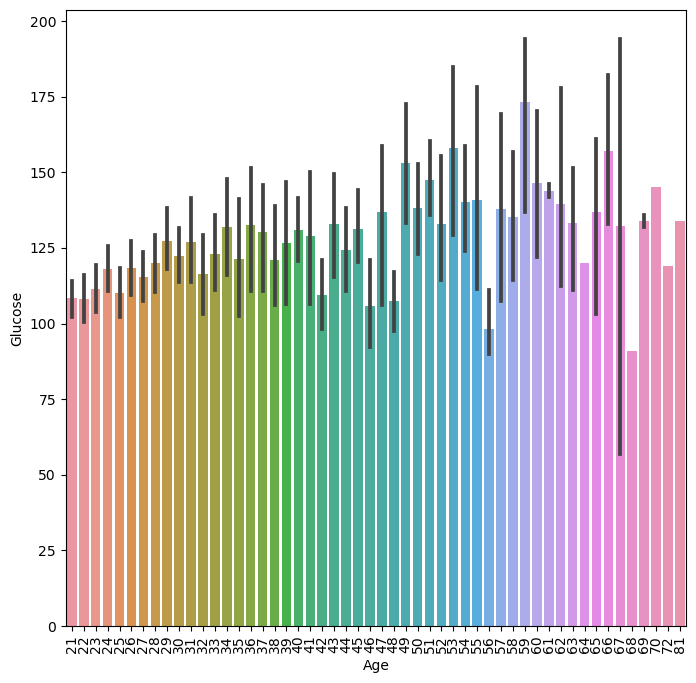

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x="Age",y="Glucose")
plt.xticks(rotation=90)
plt.show()

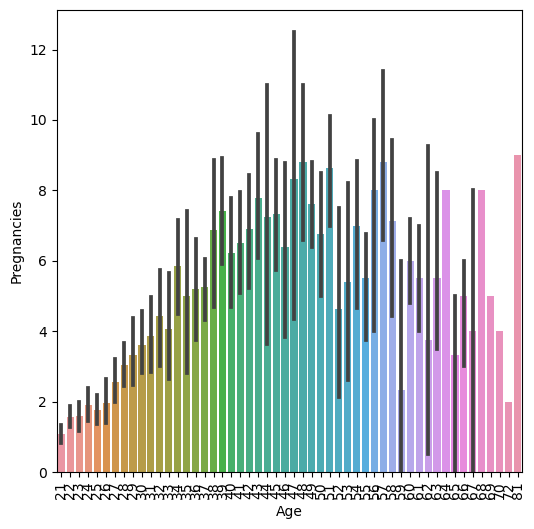

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(data=df,x="Age",y="Pregnancies")
plt.xticks(rotation=90)
plt.show()

In [10]:
X = df.drop(columns="Outcome",axis=1)

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
X.shape

(768, 8)

In [13]:
y = df['Outcome']

In [14]:
y.shape

(768,)

In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=7)

In [32]:


param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 


In [33]:

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 


RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)


In [34]:
classifier = RandomForestClassifier(n_estimators=50,max_depth=9,max_leaf_nodes=9)

In [35]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)

In [36]:
X_train_pred = classifier.predict(X_train)
X_test_pred = classifier.predict(X_test)
print("Accuracy Score for Training : " , accuracy_score(X_train_pred,y_train) )
print("Accuracy Score for Test : " , accuracy_score(X_test_pred,y_test) )

Accuracy Score for Training :  0.8159722222222222
Accuracy Score for Test :  0.7760416666666666


In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
import pickle

with open('classifier.pkl' , 'wb') as f:
    pickle.dump(classifier,f)